In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
book_df = pd.read_csv("google_books_1299.csv").dropna()
book_df = book_df.drop_duplicates(subset ="title", 
                     keep = "first", inplace = False)
book_df.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [7]:
book_df['published_date'] = book_df['published_date'].astype('datetime64[ns]')
book_df["month"] = book_df.published_date.dt.month
book_df


ValueError: Given date string not likely a datetime.

In [30]:
book_df['month'].replace(12,0, inplace = True)
book_df = pd.DataFrame(data)
book_df


,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,month,season
0,40,The Ultimate Secrets of Total Self-Confidence,Robert Anthony,4.5,42,23.85,SAR,"This is no way to live! Like so many others, y...",Penguin,240,none,9.78E+12,English,1986-11-15,11,Fall
5,237,Mrs. Pollifax Unveiled,Dorothy Gilman,3.9,21,31.46,SAR,After facing down hijackers on a flight to the...,Ballantine Books,208,"Fiction , Mystery &amp, Detective , Women Sleuths",9.78E+12,English,2000-05-31,5,Spring
10,214,The Eye of the World: Book One of 'The Wheel o...,Robert Jordan,4.7,"1,780",36.79,SAR,The Wheel of Time ® is a PBS Great American Re...,Tor Books,688,none,9.78E+12,English,2000-09-15,9,Fall
15,149,Gangster: A Novel,Lorenzo Carcaterra,4.5,79,31.46,SAR,Love. Violence. Destiny. These powerful themes...,Ballantine Books,384,"Fiction , Mystery &amp, Detective , Hard-Boiled",9.78E+12,English,2002-07-30,7,Summer
20,745,Leadership 101: What Every Leader Needs to Know,John C. Maxwell,4.4,5,32.48,SAR,Unleash your leadership potential. No matter w...,HarperCollins Leadership,128,none,9.78E+12,English,2002-09-08,9,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,114,Auberon,James S. A. Corey,4.7,15,11.78,SAR,A novella set in the universe of James S. A. C...,Hachette UK,112,none,9.78E+12,English,2019-11-12,11,Fall
1252,431,No One Is Too Small to Make a Difference,Greta Thunberg,5.0,2,38.18,SAR,"The groundbreaking speeches of Greta Thunberg,...",Penguin,112,"Nature , Environmental Conservation &amp, Prot...",9.78E+12,English,2019-11-12,11,Fall
1259,84,Final Option: 'The best one yet',Clive Cussler,5.0,3,93.75,SAR,THE THRILLING NEW OREGON FILES NOVEL FROM THE ...,Penguin UK,400,"Fiction , Crime",9.78E+12,English,2019-11-14,11,Fall
1261,212,Kiss the Girls and Make Them Cry,Mary Higgins Clark,4.0,1,42.26,SAR,AN ELECTRIFYING NEW THRILLER FROM 'QUEEN OF SU...,Simon and Schuster,400,none,9.78E+12,English,2019-11-14,11,Fall


In [31]:
labels = ['Winter', 'Spring', "Summer", 'Fall']
bins = [-.01,2.99,5.99,8.99,11]
book_df['season'] = pd.cut(book_df['month'], bins=bins, labels=labels)
book_df.head(20)

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,month,season
0,40,The Ultimate Secrets of Total Self-Confidence,Robert Anthony,4.5,42,23.85,SAR,"This is no way to live! Like so many others, y...",Penguin,240,none,9.78E+12,English,1986-11-15,11,Fall
5,237,Mrs. Pollifax Unveiled,Dorothy Gilman,3.9,21,31.46,SAR,After facing down hijackers on a flight to the...,Ballantine Books,208,"Fiction , Mystery &amp, Detective , Women Sleuths",9.78E+12,English,2000-05-31,5,Spring
10,214,The Eye of the World: Book One of 'The Wheel o...,Robert Jordan,4.7,"1,780",36.79,SAR,The Wheel of Time ® is a PBS Great American Re...,Tor Books,688,none,9.78E+12,English,2000-09-15,9,Fall
15,149,Gangster: A Novel,Lorenzo Carcaterra,4.5,79,31.46,SAR,Love. Violence. Destiny. These powerful themes...,Ballantine Books,384,"Fiction , Mystery &amp, Detective , Hard-Boiled",9.78E+12,English,2002-07-30,7,Summer
20,745,Leadership 101: What Every Leader Needs to Know,John C. Maxwell,4.4,5,32.48,SAR,Unleash your leadership potential. No matter w...,HarperCollins Leadership,128,none,9.78E+12,English,2002-09-08,9,Fall
24,69,A Game of Thrones: A Song of Ice and Fire: Boo...,George R. R. Martin,4.6,"10,650",39.34,SAR,NOW THE ACCLAIMED HBO SERIES GAME OF THRONES—T...,Bantam,720,"Fiction , Fantasy , Epic",9.78E+12,English,2003-01-01,1,Winter
29,218,Selling 101: What Every Successful Sales Profe...,Zig Ziglar,3.8,4,29.55,SAR,"Here in a short, compact and concise format is...",HarperCollins Leadership,112,none,9.78E+12,English,2003-04-01,4,Spring
33,106,Death Masks,Jim Butcher,4.8,526,39.34,SAR,The Dresden Files have taken the genre of para...,Penguin Group,464,none,9.78E+12,English,2003-08-05,8,Summer
38,28,Introducing Critical Theory: A Graphic Guide,Stuart Sim,3.7,3,23.40,SAR,The last few decades have seen an explosion in...,Icon Books,176,"Social Science , General",9.78E+12,English,2004-01-01,1,Winter
47,64,Furies of Calderon,Jim Butcher,4.7,142,14.29,SAR,"In this extraordinary fantasy epic, the #1 New...",Penguin,672,none,9.78E+12,English,2005-06-28,6,Summer


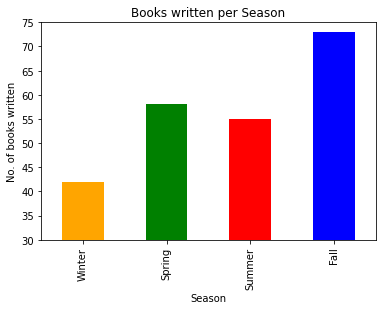

In [61]:
season_count = book_df['season'].value_counts().sort_index().plot(kind='bar',color = ['orange', 'green' , 'red', 'blue'], ylim = (30,75))
season_count.set_ylabel("No. of books written")
season_count.set_xlabel("Season")
season_count.set_title("Books written per Season")
plt.savefig('per_season.png')

In [55]:
observed = pd.Series(book_df['season'].value_counts(), index=["Fall", "Spring", "Summer", "Winter"])

In [56]:
df = pd.DataFrame([observed]).T

In [57]:
df[1] = 57

In [58]:
df.columns = ["observed", "expected"]
df

,observed,expected
Fall,73,57
Spring,58,57
Summer,55,57
Winter,42,57


In [59]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [60]:
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=8.526315789473683, pvalue=0.03629903902441098)

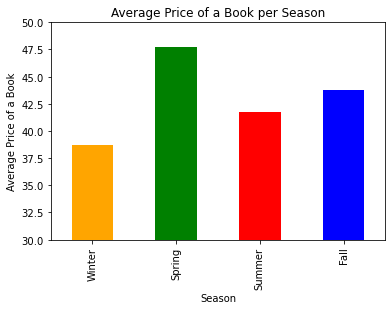

In [62]:
season_price = book_df.groupby('season')['price'].mean().sort_index().plot(kind='bar', ylim = (30,50), color = ['orange', 'green' , 'red', 'blue'])
season_price.set_ylabel("Average Price of a Book")
season_price.set_xlabel("Season")
season_price.set_title("Average Price of a Book per Season")
plt.savefig('price_per_season.png')